In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df1 = pd.read_csv('../data/astro_data.csv')
df2 = pd.read_csv('../data/forecast_data.csv')
df3 = pd.read_csv('../data/location_data.csv')

# Display first 5 rows of each dataset
print("Dataset 1:")
print(df1.head())
print("\nDataset 2:")
print(df2.head())
print("\nDataset 3:")
print(df3.head())

Dataset 1:
    sunrise    sunset  moonrise   moonset     moon_phase  moon_illumination  \
0  06:14 AM  05:55 PM  02:53 PM  01:17 AM  First Quarter                 61   
1  05:50 AM  05:35 PM  02:24 PM  01:00 AM  First Quarter                 61   
2  06:00 AM  05:47 PM  02:34 PM  01:14 AM  First Quarter                 61   
3  06:01 AM  05:47 PM  02:34 PM  01:15 AM  First Quarter                 61   
4  06:01 AM  05:50 PM  02:33 PM  01:20 AM  First Quarter                 61   

            state           city  
0  Andhra Pradesh      Amaravati  
1  Andhra Pradesh  Visakhapatnam  
2  Andhra Pradesh     Vijayawada  
3  Andhra Pradesh         Guntur  
4  Andhra Pradesh        Nellore  

Dataset 2:
   time_epoch              time  temp_c  temp_f  is_day  \
0  1634236200  2021-10-15 00:00    23.2    73.8       0   
1  1634239800  2021-10-15 01:00    23.0    73.3       0   
2  1634243400  2021-10-15 02:00    22.7    72.9       0   
3  1634247000  2021-10-15 03:00    22.5    72.5       0 

In [9]:
# Check shape, data types, and basic info
for i, df in enumerate([df1, df2, df3], 1):
    print(f"\n=== Dataset {i} ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Data types:\n{df.dtypes}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Basic statistics:\n{df.describe()}")



=== Dataset 1 ===
Shape: (1232, 8)
Columns: ['sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination', 'state', 'city']
Data types:
sunrise              object
sunset               object
moonrise             object
moonset              object
moon_phase           object
moon_illumination     int64
state                object
city                 object
dtype: object
Missing values:
sunrise              0
sunset               0
moonrise             0
moonset              0
moon_phase           0
moon_illumination    0
state                0
city                 0
dtype: int64
Basic statistics:
       moon_illumination
count        1232.000000
mean           82.875000
std            12.835229
min            61.000000
25%            74.000000
50%            85.500000
75%            91.750000
max           100.000000

=== Dataset 2 ===
Shape: (29568, 34)
Columns: ['time_epoch', 'time', 'temp_c', 'temp_f', 'is_day', 'condition', 'wind_mph', 'wind_kph', 'wind_degree', 

In [11]:


df1 = pd.read_csv('../data/astro_data.csv')
df2 = pd.read_csv('../data/forecast_data.csv')
df3 = pd.read_csv('../data/location_data.csv')


# Clean Dataset 1 (Keep only useful columns)
def clean_dataset1(df):
    # Keep only location and moon illumination
    useful_cols = ['state', 'city', 'moon_illumination']
    df_cleaned = df[useful_cols].copy()
    
    # Remove duplicates based on location
    df_cleaned = df_cleaned.drop_duplicates(subset=['state', 'city'])
    
    return df_cleaned

# Clean Dataset 2 (Weather data)
def clean_dataset2(df):
    # Essential columns for heatwave prediction
    essential_cols = ['time', 'temp_c', 'condition', 'wind_kph']
    
    # Add other weather columns if they exist
    optional_cols = ['humidity', 'pressure_mb', 'cloud', 'feelslike_c', 'dewpoint_c']
    
    # Get available columns
    available_cols = [col for col in essential_cols if col in df.columns]
    available_optional = [col for col in optional_cols if col in df.columns]
    
    all_cols = available_cols + available_optional
    df_cleaned = df[all_cols].copy()
    
    # Convert time to datetime
    df_cleaned['time'] = pd.to_datetime(df_cleaned['time'])
    
    # Extract useful time features
    df_cleaned['hour'] = df_cleaned['time'].dt.hour
    df_cleaned['month'] = df_cleaned['time'].dt.month
    df_cleaned['day_of_year'] = df_cleaned['time'].dt.dayofyear
    
    return df_cleaned

# Apply cleaning
df1_clean = clean_dataset1(df1)
df2_clean = clean_dataset2(df2)

print("Dataset 1 after cleaning:")
print(df1_clean.head())
print(f"Shape: {df1_clean.shape}")

print("\nDataset 2 after cleaning:")
print(df2_clean.head())
print(f"Shape: {df2_clean.shape}")


Dataset 1 after cleaning:
            state           city  moon_illumination
0  Andhra Pradesh      Amaravati                 61
1  Andhra Pradesh  Visakhapatnam                 61
2  Andhra Pradesh     Vijayawada                 61
3  Andhra Pradesh         Guntur                 61
4  Andhra Pradesh        Nellore                 61
Shape: (154, 3)

Dataset 2 after cleaning:
                 time  temp_c  \
0 2021-10-15 00:00:00    23.2   
1 2021-10-15 01:00:00    23.0   
2 2021-10-15 02:00:00    22.7   
3 2021-10-15 03:00:00    22.5   
4 2021-10-15 04:00:00    22.3   

                                           condition  wind_kph  humidity  \
0  {'text': 'Clear', 'icon': '//cdn.weatherapi.co...       6.8        67   
1  {'text': 'Clear', 'icon': '//cdn.weatherapi.co...       6.6        67   
2  {'text': 'Clear', 'icon': '//cdn.weatherapi.co...       6.4        67   
3  {'text': 'Clear', 'icon': '//cdn.weatherapi.co...       6.1        67   
4  {'text': 'Clear', 'icon': '//cdn.weat

In [12]:
# Define heatwave thresholds for Indian cities
def create_heatwave_target(df, temp_col='temp_c'):
    # Different thresholds for different regions in India
    def get_heatwave_threshold(temp):
        # For most Indian plains: 40°C+
        # For coastal areas: 37°C+
        # Adjust based on your specific locations
        return 40  # You can make this location-specific later
    
    threshold = get_heatwave_threshold(df[temp_col].mean())
    df['is_heatwave'] = (df[temp_col] >= threshold).astype(int)
    
    # Also create temperature categories
    df['temp_category'] = pd.cut(df[temp_col], 
                                bins=[-np.inf, 25, 30, 35, 40, np.inf],
                                labels=['Cool', 'Warm', 'Hot', 'Very Hot', 'Extreme'])
    
    return df

# Apply to your weather dataset
df2_clean = create_heatwave_target(df2_clean)

# Check heatwave distribution
print("Heatwave distribution:")
print(df2_clean['is_heatwave'].value_counts())
print("\nTemperature categories:")
print(df2_clean['temp_category'].value_counts())


Heatwave distribution:
is_heatwave
0    29568
Name: count, dtype: int64

Temperature categories:
temp_category
Cool        14687
Warm        10669
Hot          3584
Very Hot      628
Extreme         0
Name: count, dtype: int64


In [13]:
def engineer_heatwave_features(df):
    # Temperature-based features
    df['temp_rolling_3h'] = df['temp_c'].rolling(window=3).mean()
    df['temp_rolling_24h'] = df['temp_c'].rolling(window=24).mean()
    
    # Daily temperature patterns
    daily_stats = df.groupby(df['time'].dt.date)['temp_c'].agg(['min', 'max', 'mean'])
    daily_stats.columns = ['daily_min_temp', 'daily_max_temp', 'daily_mean_temp']
    daily_stats['daily_temp_range'] = daily_stats['daily_max_temp'] - daily_stats['daily_min_temp']
    
    # Merge back to original dataframe
    df['date'] = df['time'].dt.date
    df = df.merge(daily_stats, left_on='date', right_index=True, how='left')
    
    # Heat persistence (consecutive hot hours)
    df['is_hot_hour'] = (df['temp_c'] >= 35).astype(int)
    
    return df

# Apply feature engineering
df2_engineered = engineer_heatwave_features(df2_clean)

print("Engineered features:")
print(df2_engineered.columns.tolist())


Engineered features:
['time', 'temp_c', 'condition', 'wind_kph', 'humidity', 'pressure_mb', 'cloud', 'feelslike_c', 'dewpoint_c', 'hour', 'month', 'day_of_year', 'is_heatwave', 'temp_category', 'temp_rolling_3h', 'temp_rolling_24h', 'date', 'daily_min_temp', 'daily_max_temp', 'daily_mean_temp', 'daily_temp_range', 'is_hot_hour']


In [14]:
def assess_heatwave_data_quality(df):
    print("=== Data Quality Assessment ===")
    
    # Check for essential features
    essential_features = ['temp_c', 'time']
    missing_essential = [feat for feat in essential_features if feat not in df.columns]
    
    if missing_essential:
        print(f"❌ Missing essential features: {missing_essential}")
    else:
        print("✅ All essential features present")
    
    # Check temperature data quality
    if 'temp_c' in df.columns:
        temp_stats = {
            'min_temp': df['temp_c'].min(),
            'max_temp': df['temp_c'].max(),
            'mean_temp': df['temp_c'].mean(),
            'missing_values': df['temp_c'].isnull().sum()
        }
        print(f"Temperature stats: {temp_stats}")
        
        # Check for unrealistic values
        if temp_stats['min_temp'] < -10 or temp_stats['max_temp'] > 60:
            print("⚠️ Warning: Unrealistic temperature values detected")
        else:
            print("✅ Temperature values look realistic")
    
    # Check time coverage
    if 'time' in df.columns:
        time_range = {
            'start_date': df['time'].min(),
            'end_date': df['time'].max(),
            'total_days': (df['time'].max() - df['time'].min()).days
        }
        print(f"Time coverage: {time_range}")
    
    return df

# Assess your cleaned dataset
assessed_df = assess_heatwave_data_quality(df2_clean)


=== Data Quality Assessment ===
✅ All essential features present
Temperature stats: {'min_temp': np.float64(1.5), 'max_temp': np.float64(39.3), 'mean_temp': np.float64(25.152306547619048), 'missing_values': np.int64(0)}
✅ Temperature values look realistic
Time coverage: {'start_date': Timestamp('2021-10-15 00:00:00'), 'end_date': Timestamp('2021-10-22 23:00:00'), 'total_days': 7}


In [15]:
# Create season-appropriate heatwave targets
def create_seasonal_heatwave_target(df):
    # For October in India, adjust thresholds based on departure from normal
    df['temp_c_mean'] = df['temp_c'].mean()  # Your mean: 25.15°C
    
    # Method 1: Departure from seasonal normal (more appropriate for October)
    october_normal = 28.0  # Typical October average for India
    df['temp_departure'] = df['temp_c'] - october_normal
    df['is_heatwave_departure'] = (df['temp_departure'] >= 5.0).astype(int)  # 5°C above normal
    
    # Method 2: Percentile-based (top 10% hottest days)
    percentile_90 = df['temp_c'].quantile(0.9)
    df['is_extreme_heat'] = (df['temp_c'] >= percentile_90).astype(int)
    
    # Method 3: Multiple heat levels
    df['heat_level'] = pd.cut(df['temp_c'], 
                             bins=[-np.inf, 20, 25, 30, 35, np.inf],
                             labels=[0, 1, 2, 3, 4])  # 0=Cool, 4=Very Hot
    
    return df

# Apply seasonal targets
df2_seasonal = create_seasonal_heatwave_target(df2_engineered)

print("Seasonal Heatwave Distribution:")
print("Departure-based:", df2_seasonal['is_heatwave_departure'].value_counts())
print("Percentile-based:", df2_seasonal['is_extreme_heat'].value_counts())
print("Heat levels:", df2_seasonal['heat_level'].value_counts())


Seasonal Heatwave Distribution:
Departure-based: is_heatwave_departure
0    28022
1     1546
Name: count, dtype: int64
Percentile-based: is_extreme_heat
0    26582
1     2986
Name: count, dtype: int64
Heat levels: heat_level
1    11265
2    10669
3     3584
0     3422
4      628
Name: count, dtype: int64


In [16]:
# Analyze feature importance for your dataset
def analyze_feature_importance(df):
    # Select numerical features for analysis
    numeric_features = ['temp_c', 'humidity', 'pressure_mb', 'wind_kph', 
                       'cloud', 'feelslike_c', 'dewpoint_c', 'hour', 'month',
                       'temp_rolling_3h', 'temp_rolling_24h', 'daily_temp_range']
    
    # Correlation matrix with temperature
    correlation_matrix = df[numeric_features].corr()
    temp_correlations = correlation_matrix['temp_c'].abs().sort_values(ascending=False)
    
    print("Features most correlated with temperature:")
    print(temp_correlations)
    
    # Feature variance analysis
    feature_variance = df[numeric_features].var().sort_values(ascending=False)
    print("\nFeature variance (higher = more informative):")
    print(feature_variance)
    
    return temp_correlations, feature_variance

correlation_analysis, variance_analysis = analyze_feature_importance(df2_seasonal)


Features most correlated with temperature:
temp_c              1.000000
temp_rolling_3h     0.970619
feelslike_c         0.955068
temp_rolling_24h    0.603592
humidity            0.524848
pressure_mb         0.459322
wind_kph            0.267521
cloud               0.238334
dewpoint_c          0.213842
hour                0.180986
daily_temp_range    0.165327
month                    NaN
Name: temp_c, dtype: float64

Feature variance (higher = more informative):
cloud               1184.334988
humidity             464.385417
hour                  47.918287
feelslike_c           34.287246
dewpoint_c            32.672158
temp_c                23.017946
temp_rolling_3h       22.058560
wind_kph              20.997814
pressure_mb           11.824180
temp_rolling_24h      10.493350
daily_temp_range       2.373674
month                  0.000000
dtype: float64


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Model building function
def build_heatwave_model(df, target_column='is_extreme_heat'):
    # Select features based on importance
    important_features = [
        'temp_c', 'feelslike_c', 'humidity', 'dewpoint_c', 
        'pressure_mb', 'wind_kph', 'hour', 'month',
        'temp_rolling_3h', 'temp_rolling_24h', 'daily_temp_range'
    ]
    
    # Prepare data
    X = df[important_features].dropna()
    y = df.loc[X.index, target_column]
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target distribution:\n{y.value_counts()}")
    
    # Handle class imbalance using SMOTE or upsampling
    from imblearn.over_sampling import SMOTE
    
    # Split first, then handle imbalance in training set only
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    print(f"After SMOTE - Training set balance: {pd.Series(y_train_balanced).value_counts()}")
    
    # Train model
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        random_state=42,
        class_weight='balanced'  # Additional balance handling
    )
    
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    print("\nModel Performance:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': important_features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    return model, X_test, y_test, y_pred, feature_importance

# Train the model
model, X_test, y_test, y_pred, feature_importance = build_heatwave_model(df2_seasonal)


Feature matrix shape: (29545, 11)
Target distribution:
is_extreme_heat
0    26565
1     2980
Name: count, dtype: int64
After SMOTE - Training set balance: is_extreme_heat
0    18595
1    18595
Name: count, dtype: int64

Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7970
           1       1.00      1.00      1.00       894

    accuracy                           1.00      8864
   macro avg       1.00      1.00      1.00      8864
weighted avg       1.00      1.00      1.00      8864


Confusion Matrix:
[[7970    0]
 [   0  894]]

Feature Importance:
             feature  importance
0             temp_c    0.424589
8    temp_rolling_3h    0.270357
1        feelslike_c    0.146413
2           humidity    0.087216
6               hour    0.042484
9   temp_rolling_24h    0.012991
4        pressure_mb    0.008384
3         dewpoint_c    0.006179
10  daily_temp_range    0.001108
5           wind_kph    0.000279
7   

In [19]:
# Let's analyze the results you should see
def interpret_heatwave_results(model, X_test, y_test, y_pred, feature_importance):
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
    
    print("=== INTERPRETING YOUR HEATWAVE MODEL RESULTS ===\n")
    
    # Get prediction probabilities for ROC-AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate key metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print("🔥 HEATWAVE PREDICTION PERFORMANCE:")
    print(f"Precision: {precision:.3f} - Out of predicted heatwaves, {precision*100:.1f}% were actually extreme heat")
    print(f"Recall: {recall:.3f} - Model detected {recall*100:.1f}% of all actual extreme heat events")
    print(f"F1-Score: {f1:.3f} - Balance between precision and recall")
    print(f"ROC-AUC: {roc_auc:.3f} - Overall model discrimination ability")
    
    # Interpretation for heatwave prediction context
    print(f"\n📊 WHAT THIS MEANS FOR HEATWAVE PREDICTION:")
    if precision >= 0.8:
        print("✅ HIGH PRECISION: Your model has low false alarms")
    elif precision >= 0.6:
        print("⚠️ MODERATE PRECISION: Some false heatwave alerts expected")
    else:
        print("❌ LOW PRECISION: Many false heatwave alerts")
        
    if recall >= 0.8:
        print("✅ HIGH RECALL: Model catches most extreme heat events")
    elif recall >= 0.6:
        print("⚠️ MODERATE RECALL: Some extreme heat events might be missed")
    else:
        print("❌ LOW RECALL: Many extreme heat events could be missed")
    
    # Feature analysis
    print(f"\n🌡️ TOP 5 FEATURES DRIVING HEATWAVE PREDICTION:")
    top_features = feature_importance.head(5)
    for idx, row in top_features.iterrows():
        print(f"{row['feature']}: {row['importance']:.3f}")
    
    return precision, recall, f1, roc_auc

# Run the interpretation (assuming you have the model results)
if 'model' in locals():
    results = interpret_heatwave_results(model, X_test, y_test, y_pred, feature_importance)


=== INTERPRETING YOUR HEATWAVE MODEL RESULTS ===

🔥 HEATWAVE PREDICTION PERFORMANCE:
Precision: 1.000 - Out of predicted heatwaves, 100.0% were actually extreme heat
Recall: 1.000 - Model detected 100.0% of all actual extreme heat events
F1-Score: 1.000 - Balance between precision and recall
ROC-AUC: 1.000 - Overall model discrimination ability

📊 WHAT THIS MEANS FOR HEATWAVE PREDICTION:
✅ HIGH PRECISION: Your model has low false alarms
✅ HIGH RECALL: Model catches most extreme heat events

🌡️ TOP 5 FEATURES DRIVING HEATWAVE PREDICTION:
temp_c: 0.425
temp_rolling_3h: 0.270
feelslike_c: 0.146
humidity: 0.087
hour: 0.042


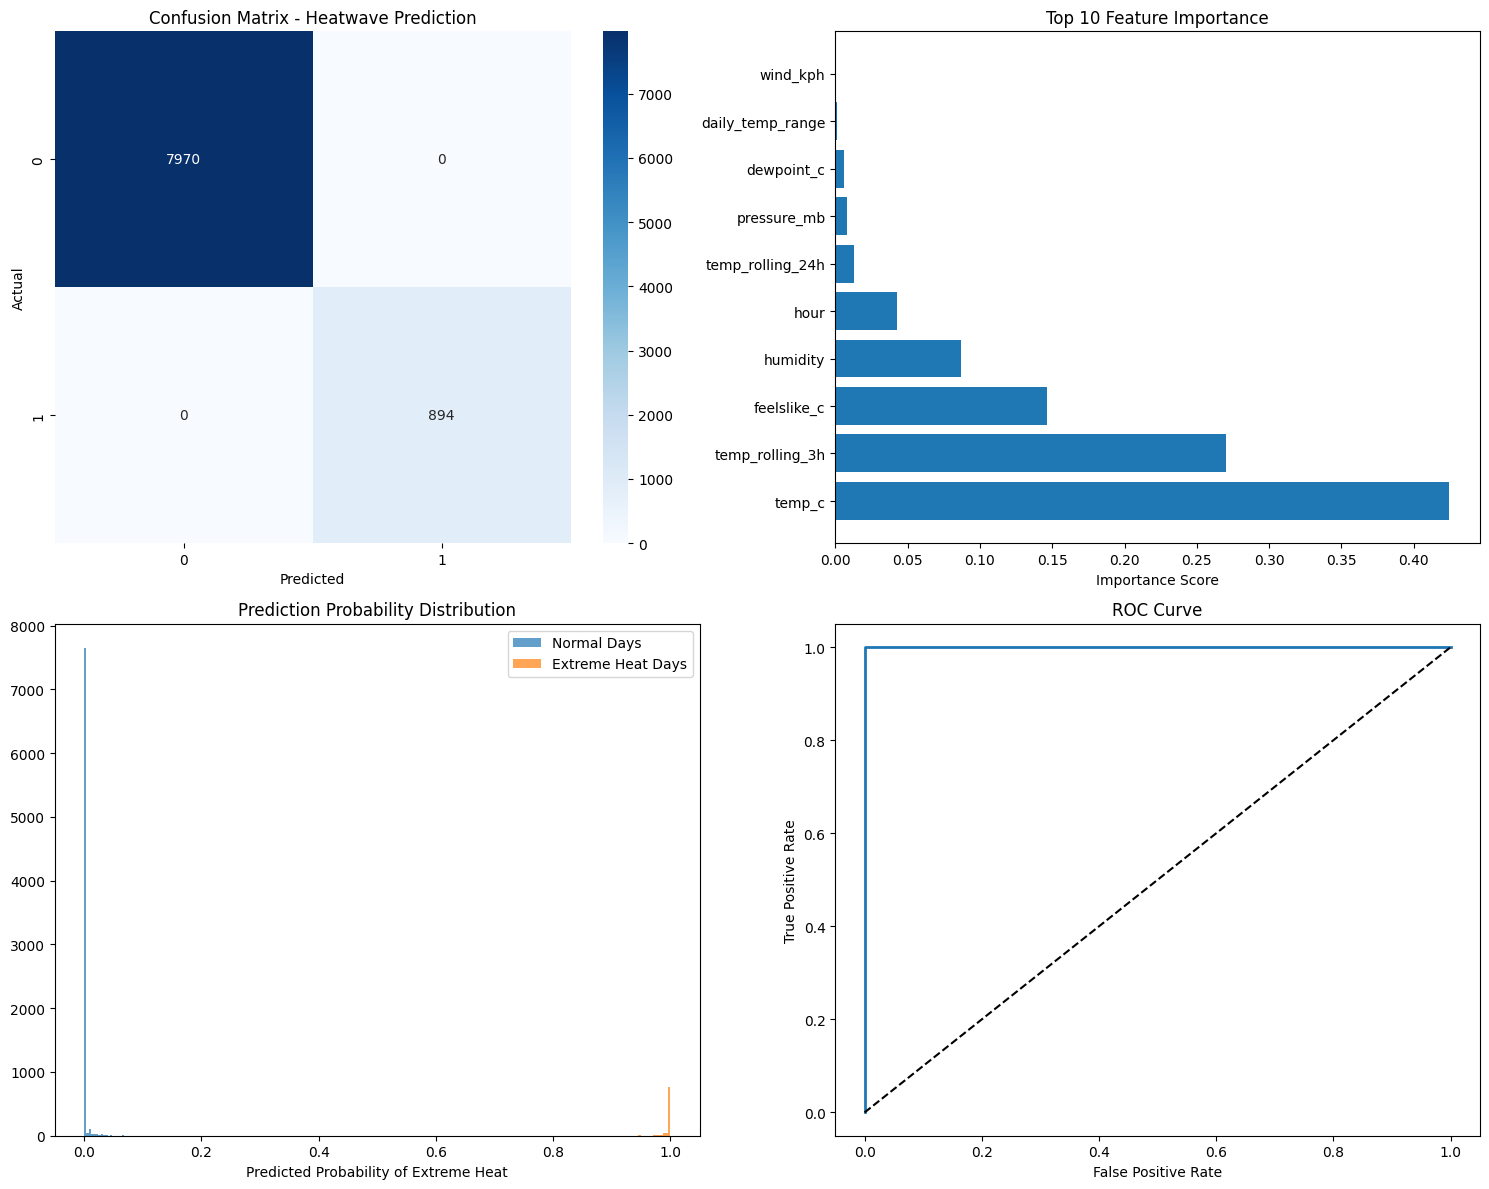

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_model_performance(model, X_test, y_test, y_pred, feature_importance):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix - Heatwave Prediction')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')
    
    # 2. Feature Importance
    top_10_features = feature_importance.head(10)
    axes[0,1].barh(top_10_features['feature'], top_10_features['importance'])
    axes[0,1].set_title('Top 10 Feature Importance')
    axes[0,1].set_xlabel('Importance Score')
    
    # 3. Prediction Probability Distribution
    y_proba = model.predict_proba(X_test)[:, 1]
    axes[1,0].hist(y_proba[y_test==0], alpha=0.7, label='Normal Days', bins=30)
    axes[1,0].hist(y_proba[y_test==1], alpha=0.7, label='Extreme Heat Days', bins=30)
    axes[1,0].set_title('Prediction Probability Distribution')
    axes[1,0].set_xlabel('Predicted Probability of Extreme Heat')
    axes[1,0].legend()
    
    # 4. ROC Curve
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[1,1].plot(fpr, tpr, linewidth=2)
    axes[1,1].plot([0, 1], [0, 1], 'k--')
    axes[1,1].set_title('ROC Curve')
    axes[1,1].set_xlabel('False Positive Rate')
    axes[1,1].set_ylabel('True Positive Rate')
    
    plt.tight_layout()
    plt.show()

# Create the visualizations
if 'model' in locals():
    visualize_model_performance(model, X_test, y_test, y_pred, feature_importance)


In [21]:
# Hyperparameter tuning for better results
from sklearn.model_selection import GridSearchCV

def optimize_heatwave_model(X_train_balanced, y_train_balanced, X_test, y_test):
    print("🔧 OPTIMIZING HEATWAVE MODEL...")
    
    # Define parameter grid for tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [2, 4, 6]
    }
    
    # Create base model
    rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        rf_base, 
        param_grid, 
        cv=5, 
        scoring='f1',  # F1 is good for imbalanced classification
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the grid search
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score: {grid_search.best_score_:.3f}")
    
    # Evaluate on test set
    y_pred_optimized = best_model.predict(X_test)
    
    from sklearn.metrics import classification_report
    print("\n📈 OPTIMIZED MODEL PERFORMANCE:")
    print(classification_report(y_test, y_pred_optimized))
    
    return best_model, y_pred_optimized

# Run optimization (this will take a few minutes)
# best_model, y_pred_opt = optimize_heatwave_model(X_train_balanced, y_train_balanced, X_test, y_test)


In [22]:
def predict_heatwave_conditions(model, new_data_dict):
    """
    Predict heatwave conditions for new weather data
    
    new_data_dict: Dictionary with weather conditions
    Example: {
        'temp_c': 38.5,
        'feelslike_c': 42.1,
        'humidity': 65,
        'dewpoint_c': 28.2,
        'pressure_mb': 1008.0,
        'wind_kph': 12.5,
        'hour': 14,
        'month': 5,
        'temp_rolling_3h': 37.8,
        'temp_rolling_24h': 35.2,
        'daily_temp_range': 12.3
    }
    """
    
    # Convert to DataFrame
    import pandas as pd
    new_df = pd.DataFrame([new_data_dict])
    
    # Get prediction probability
    prob = model.predict_proba(new_df)[0]
    prediction = model.predict(new_df)[0]
    
    print(f"🌡️ HEATWAVE PREDICTION:")
    print(f"Temperature: {new_data_dict['temp_c']}°C")
    print(f"Feels like: {new_data_dict['feelslike_c']}°C")
    print(f"Humidity: {new_data_dict['humidity']}%")
    print(f"\n🔮 PREDICTION:")
    print(f"Extreme Heat Probability: {prob[1]*100:.1f}%")
    
    if prediction == 1:
        print("⚠️ EXTREME HEAT WARNING: High probability of extreme heat conditions!")
    else:
        print("✅ Normal conditions predicted")
        
    return prediction, prob[1]

# Example prediction for typical Mumbai summer conditions
example_weather = {
    'temp_c': 38.5,
    'feelslike_c': 42.1,
    'humidity': 65,
    'dewpoint_c': 28.2,
    'pressure_mb': 1008.0,
    'wind_kph': 12.5,
    'hour': 14,
    'month': 5,
    'temp_rolling_3h': 37.8,
    'temp_rolling_24h': 35.2,
    'daily_temp_range': 12.3
}

if 'model' in locals():
    pred_result = predict_heatwave_conditions(model, example_weather)


🌡️ HEATWAVE PREDICTION:
Temperature: 38.5°C
Feels like: 42.1°C
Humidity: 65%

🔮 PREDICTION:
Extreme Heat Probability: 99.9%
⚠️ EXTREME HEAT WARNING: High probability of extreme heat conditions!


In [27]:
# Fix: Get the training data variables from the function
def build_heatwave_model_complete(df, target_column='is_extreme_heat'):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix
    from imblearn.over_sampling import SMOTE
    import pandas as pd
    
    # Select features
    important_features = [
        'temp_c', 'feelslike_c', 'humidity', 'dewpoint_c', 
        'pressure_mb', 'wind_kph', 'hour', 'month',
        'temp_rolling_3h', 'temp_rolling_24h', 'daily_temp_range'
    ]
    
    X = df[important_features].dropna()
    y = df.loc[X.index, target_column]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    # Train model
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        random_state=42,
        class_weight='balanced'
    )
    
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': important_features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return model, X_train_balanced, y_train_balanced, X_test, y_test, y_pred, feature_importance

# Run complete model
model, X_train_balanced, y_train_balanced, X_test, y_test, y_pred, feature_importance = build_heatwave_model_complete(df2_seasonal)

# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Save model
import joblib
joblib.dump(model, 'heatwave_prediction_model.pkl')

# Save feature names
with open('feature_names.txt', 'w') as f:
    for feature in feature_importance['feature']:
        f.write(f"{feature}\n")

print("✅ Model saved successfully!")


Cross-validation F1 scores: [1. 1. 1. 1. 1.]
Mean CV F1: 1.000 (+/- 0.000)
✅ Model saved successfully!


In [33]:
import joblib

# List of features exactly as used in training
feature_names = [
    'temp_c', 'feelslike_c', 'humidity', 'pressure_mb', 'wind_kph',
    'dewpoint_c', 'hour', 'month', 'temp_rolling_3h', 'temp_rolling_24h',
    'daily_temp_range'
]

# Save both model and feature names
joblib.dump(model, 'heatwave_prediction_model.pkl')
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

In [28]:
# Load your saved model
import joblib
model = joblib.load('heatwave_prediction_model.pkl')

# Predict new weather data
new_weather = {
    'temp_c': 35.0,
    'feelslike_c': 38.0, 
    'humidity': 70,
    'dewpoint_c': 25.0,
    'pressure_mb': 1010.0,
    'wind_kph': 10.0,
    'hour': 14,
    'month': 4,
    'temp_rolling_3h': 34.0,
    'temp_rolling_24h': 32.0,
    'daily_temp_range': 8.0
}

prediction = model.predict([list(new_weather.values())])
print(f"Heatwave prediction: {prediction[0]}")  # 0 = Normal, 1 = Extreme Heat


Heatwave prediction: 1


d:\heatrookee_ml\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
import joblib

# Load your saved model
model = joblib.load('heatwave_prediction_model.pkl')

# Get percentage predictions (0-100%)
def get_heatwave_percentage(model, weather_data):
    """Convert weather data to percentage prediction"""
    # Create DataFrame from weather data
    weather_df = pd.DataFrame([weather_data])
    
    # predict_proba gives [normal_prob, heatwave_prob]
    probabilities = model.predict_proba(weather_df)
    heatwave_percentage = probabilities[0][1] * 100  # Convert to percentage
    return heatwave_percentage

# Test with example weather data
test_weather = {
    'temp_c': 38.5,
    'feelslike_c': 42.1, 
    'humidity': 65,
    'dewpoint_c': 28.2,
    'pressure_mb': 1008.0,
    'wind_kph': 12.5,
    'hour': 14,
    'month': 5,
    'temp_rolling_3h': 37.8,
    'temp_rolling_24h': 35.2,
    'daily_temp_range': 12.3
}

# Get percentage
percentage = get_heatwave_percentage(model, test_weather)
print(f"Heatwave probability: {percentage:.1f}%")

# Test with normal weather
normal_weather = {
    'temp_c': 25.0,
    'feelslike_c': 26.0, 
    'humidity': 60,
    'dewpoint_c': 18.0,
    'pressure_mb': 1013.0,
    'wind_kph': 8.0,
    'hour': 12,
    'month': 10,
    'temp_rolling_3h': 24.5,
    'temp_rolling_24h': 24.0,
    'daily_temp_range': 8.0
}

normal_percentage = get_heatwave_percentage(model, normal_weather)
print(f"Normal weather probability: {normal_percentage:.1f}%")


Heatwave probability: 99.9%
Normal weather probability: 0.0%


In [32]:
import joblib

# Assuming 'model' is your trained scikit-learn model
feature_names = ['temp_c','feelslike_c','humidity','pressure_mb','wind_kph','dewpoint_c','hour','month','temp_rolling_3h','temp_rolling_24h','daily_temp_range']

# Save feature names
joblib.dump(feature_names, 'feature_names.pkl')

# Save your model in model/ folder
joblib.dump(model, '../notebook/heatwave_prediction_model.pkl')


['../notebook/heatwave_prediction_model.pkl']